<a href="https://colab.research.google.com/github/SebastianSasaki/cc41_tf_201910349_201915516_201910081_202117686_201917229/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import graphviz as gv #Graficos
import numpy as np
import pandas as pd #Leer CSV
import matplotlib.pyplot as plt # Gragicos final
import math as math #Operaciones matematicas

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

# Stores (Almacenes)

In [ ]:
coords_str = pd.read_csv("almacenes.csv")   #AQUI SE LEE EL CSV DE LOS ALMACENES
coords_str #SE LOS GUARDA EN LA VARIABLE

In [ ]:
coord_sx = coords_str['coordenada X']   
coord_sy = coords_str['coordenada Y']
stores = []

for i in range(len(coord_sx)):
  stores.append([coord_sx[i], coord_sy[i]])

stores

#  Delivery Points (Puntos de entrega)

In [ ]:
coords_dp = pd.read_csv("puntos_entrega.csv")
coords_dp

In [ ]:
coord_dx = coords_dp['coordenada X']
coord_dy = coords_dp['coordenada Y']
delivery_points = []

for i in range(len(coord_dx)):
  delivery_points.append([coord_dx[i], coord_dy[i]])

delivery_points

## CALCULO DE DISTANCIAS ENTRE COORDENADAS

In [ ]:
def distancia(x1, y1, x2, y2):
  return math.sqrt( (x2-x1)**2 + (y2-y1)**2 )
  

In [ ]:
print(distancia(-4, 0, 5, 0))  #PRUEBA DE FUNCIONAMIENTO

9.0


## REPRESENTACIÓN 1


In [ ]:
#Sebastian Gonzales 
NS = len(stores)
NDP = len(delivery_points)
Total = 1000000 - (NS+NDP+1)
print(Total)

arr = []
for _ in range(Total):
  arr.append([0]*3)

#ALMACENES
coord_sx = coords_str['coordenada X']   
coord_sy = coords_str['coordenada Y']

#DELIVERY POINTS
coord_dx = coords_dp['coordenada X']
coord_dy = coords_dp['coordenada Y']


#1's para Storages
for i in range(len(coord_sx)):
  arr.append([coord_sx[i], coord_sy[i], 1])


#-1's para Delivery Points
for i in range(len(coord_dx)):
  arr.append([coord_dx[i], coord_dy[i], -1] )

arr

## REPRESENTACION 2

In [ ]:
#PLAYGROUND DE FICHEROS

f= open("prueba.txt","w+")
for i in range(10):
  for j in range(5):
    f.write("Primero esto %d  Fila %d " % ((j+1), (i+1) )  
  f.write("\n")
f.close()


SyntaxError: ignored

In [ ]:
#Crear una lista de adyacencia parecida a la trabajada en clase
#2|4 4|3

NS = len(stores)
NDP = len(delivery_points)

f=open("Adyacencia.txt", "w+")

#Son 60 Almacenes y 2539 Entregas
#En la primera iteracion: Almacen1(nodo 0) = 60|distancia[0,60] 61|distancia[0,61]

for i in range(NS-1):
  for j in range(NDP-1):
    dis = distancia(stores[i][0], stores[i][1], delivery_points[j][0], delivery_points[j][1]) #Distancia 
    # Se tiene que escribir: "NS+i|dis "
  #Se tiene que dar el salto de linea




## REPRESENTACIÓN GRAFICA

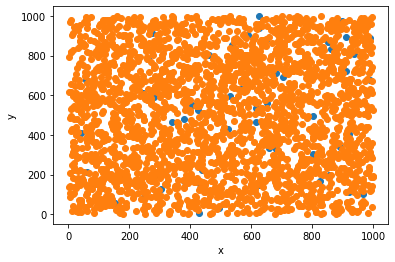

In [ ]:
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(coords_str['coordenada X'], coords_str['coordenada Y'])
plt.scatter(coords_dp['coordenada X'], coords_dp['coordenada Y'])

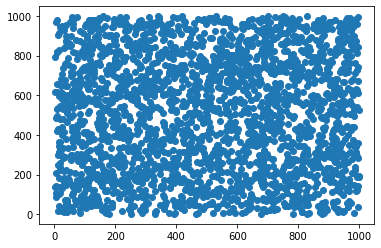

In [ ]:
plt.scatter(coords_dp['coordenada X'], coords_dp['coordenada Y'])

In [ ]:
plt.scatter(coords_)

## ZONA DE PRUBAS

In [ ]:
import random as rd

points = []

while len(points) < 2560:
  x = rd.randint(0,2000)
  y = rd.randint(0,2000)
  if [x, y] not in points:
    points.append([x, y])

In [ ]:
entregas = points[0:2500]
almacenes = points[2500:]

In [ ]:
data_test = [[9,10], [17,18], [4,12], [1,2], [9,11]]

In [ ]:
st = [[1,5], [1,4], [2,6], [3,8], [4,8], [7,2], [8,3]]
dp = [[1,1], [1,3], [3,4], [4,5], [5,2], [9,9]]

In [ ]:
def toPosition(x, y, n):
  return x + y*n;

In [ ]:
def makeAdjList(st, dp):
  ls = []     
  n = 10

  for x in range(n):
    for y in range(n):      
      tp = 0
      directions = [-1]*4
      
      if [x,y] in st:
        tp = 1
      if [x,y] in dp:
        tp = 2

      if [x-1,y] in st:
        directions[0] = ((x-1)*y)
      if [x-1,y] in dp:
        directions[0] = ((x-1)*y)   

      if [x,y-1] in st:
        directions[1] = (x*(y-1))
      if [x,y-1] in dp:
        directions[1] = (x*(y-1))

      if [x+1,y] in st:
        directions[2] = ((x+1)*y)
      if [x+1,y] in dp:
        directions[2] = ((x+1)*y)

      if [x,y-1] in st:
        directions[3] = (x*(y+1))
      if [x,y-1] in dp:
        directions[3] = (x*(y+1))

      ls.append([tp,[x,y], directions])

  return ls

In [ ]:
f = makeAdjList(st, dp)
f

#Representacion Lista de Adyacencia

In [ ]:
def toPosition(x, y, n):
  return x + y*n;

def adjacents(x, y, n, st, dp):
  dir = [-1]*4
  coords = [[x-1, y],[x, y-1],[x+1, y],[x, y+1]]
  for i, c in enumerate(coords):
    if c in st or c in dp:
      dir[i] = toPosition(c[0], c[1], n)
  return dir

In [ ]:
def makeAdjList(st, dp, n):
  ls = []
  for x in range(n):
    for y in range(n):
      tp = 0
      if [x,y] in st:
        tp = 1        
      if [x,y] in dp:
        tp = 2
      directions = adjacents(x, y, n, st, dp)
      ls.append([tp,[x,y], directions])
  return ls

In [ ]:
import random as rd

points = []

while len(points) < 1500:
  x = rd.randint(0,100)
  y = rd.randint(0,100)
  if [x, y] not in points:
    points.append([x, y])

entregas = points[0:1000]
almacenes = points[1000:]

In [ ]:
makeAdjList(almacenes, entregas, 100)